In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [2]:
customer = pd.read_csv(r"D:/saikrishna data science/MACHINE PROJECTS/CLUSTRINGS/Mall_Customers.csv")

In [3]:
customer.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
customer.shape

(200, 5)

In [6]:
customer.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [7]:
customer.drop(labels='CustomerID',axis=1,inplace=True)

In [8]:
customer.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [9]:
customer['Gender'] = customer['Gender'].map({'Male': 1, "Female": 0})

In [10]:
customer.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


### Data Exploration and Visualization

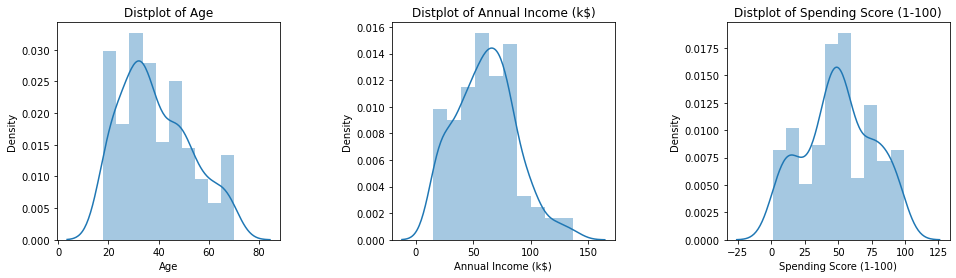

In [11]:
plt.figure(1, figsize=(16,4))
n = 0 
for x in ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']:
    n += 1
    plt.subplot(1, 3, n)
    plt.subplots_adjust(hspace=0.5 , wspace=0.5)
    sns.distplot(customer[x] , bins=10)
    plt.title('Distplot of {}'.format(x))
plt.show()

### Plot pairwise relationships between features in a dataset.

<Figure size 1152x720 with 0 Axes>

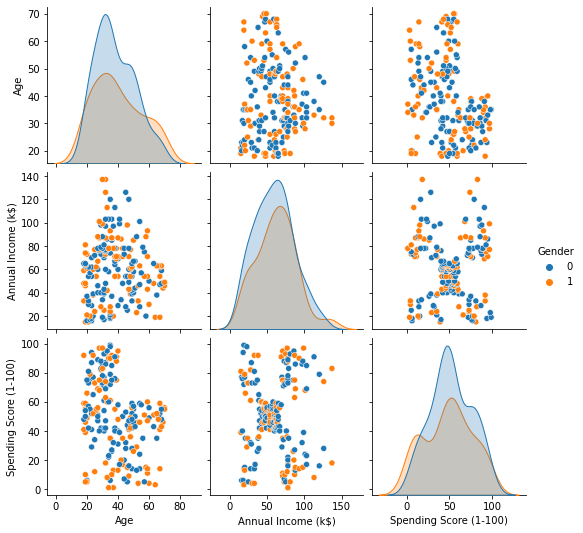

In [12]:
plt.figure(1, figsize=(16,10))
sns.pairplot(data=customer, hue='Gender')
plt.show()

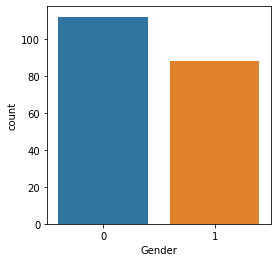

In [13]:
plt.figure(1, figsize=(4,4))
sns.countplot(x='Gender', data=customer)
plt.show()

In [14]:
customer.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


In [15]:
km_inertias, km_scores = [], []

for k in range(3, 10):
    km = KMeans(n_clusters=k).fit(customer)
    km_inertias.append(km.inertia_)
    km_scores.append(silhouette_score(customer, km.labels_))
    print(f"Processing K-Means with k = {k}, Intertia = {km.inertia_}, Silhoutte Score = {silhouette_score(customer, km.labels_)}")

Processing K-Means with k = 3, Intertia = 143391.5923603568, Silhoutte Score = 0.383798873822341
Processing K-Means with k = 4, Intertia = 104414.67534220166, Silhoutte Score = 0.4052954330641215
Processing K-Means with k = 5, Intertia = 75421.38291301335, Silhoutte Score = 0.443430209791173
Processing K-Means with k = 6, Intertia = 58348.64136331505, Silhoutte Score = 0.45205475380756527
Processing K-Means with k = 7, Intertia = 51130.69008126376, Silhoutte Score = 0.4409411333609709
Processing K-Means with k = 8, Intertia = 44355.31351771352, Silhoutte Score = 0.427541566977401
Processing K-Means with k = 9, Intertia = 40708.4571928072, Silhoutte Score = 0.41141339517976894


### Elbow Method to find Optimum k

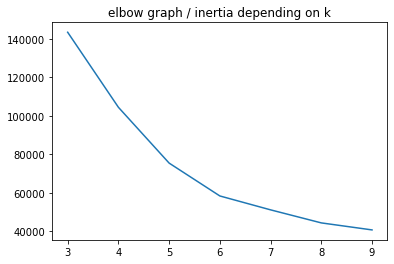

In [16]:
sns.lineplot(range(3, 10), km_inertias)
plt.title('elbow graph / inertia depending on k')
plt.show()

### Silhoutte Method for optimum k

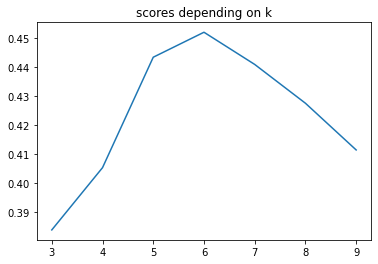

In [17]:
sns.lineplot(range(3, 10), km_scores)
plt.title('scores depending on k')
plt.show()

In [18]:
km = KMeans(n_clusters=6).fit(customer)

In [19]:
customer.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


In [20]:
customer['Label'] = km.labels_
customer

,Gender,Age,Annual Income (k$),Spending Score (1-100),Label
0,1,19,15,39,3
1,1,21,15,81,5
2,0,20,16,6,3
3,0,23,16,77,5
4,0,31,17,40,3
...,...,...,...,...,...
195,0,35,120,79,0
196,0,45,126,28,1
197,1,32,126,74,0
198,1,32,137,18,1


In [21]:
customer['Label'].unique()

array([3, 5, 4, 2, 0, 1])

In [22]:
customer.Label.value_counts()

4    45
0    39
2    38
1    35
5    22
3    21
Name: Label, dtype: int64

In [23]:
pivot = customer.pivot_table(values=['Annual Income (k$)', 'Spending Score (1-100)', 'Age'], index=['Label'], aggfunc=np.mean)
pivot

,Age,Annual Income (k$),Spending Score (1-100)
Label,,,
0,32.692308,86.538462,82.128205
1,41.685714,88.228571,17.285714
2,27.000000,56.657895,49.131579
3,44.142857,25.142857,19.523810
4,56.155556,53.377778,49.088889
5,25.272727,25.727273,79.363636


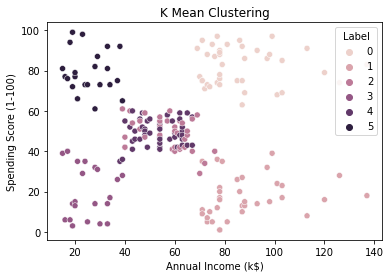

In [24]:
# Create a colormap

# Plot the Original Classifications
sns.scatterplot(customer['Annual Income (k$)'], customer['Spending Score (1-100)'],hue=customer['Label'])
plt.title('K Mean Clustering')
plt.show()

### Hierarchical Clustering

In [25]:
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

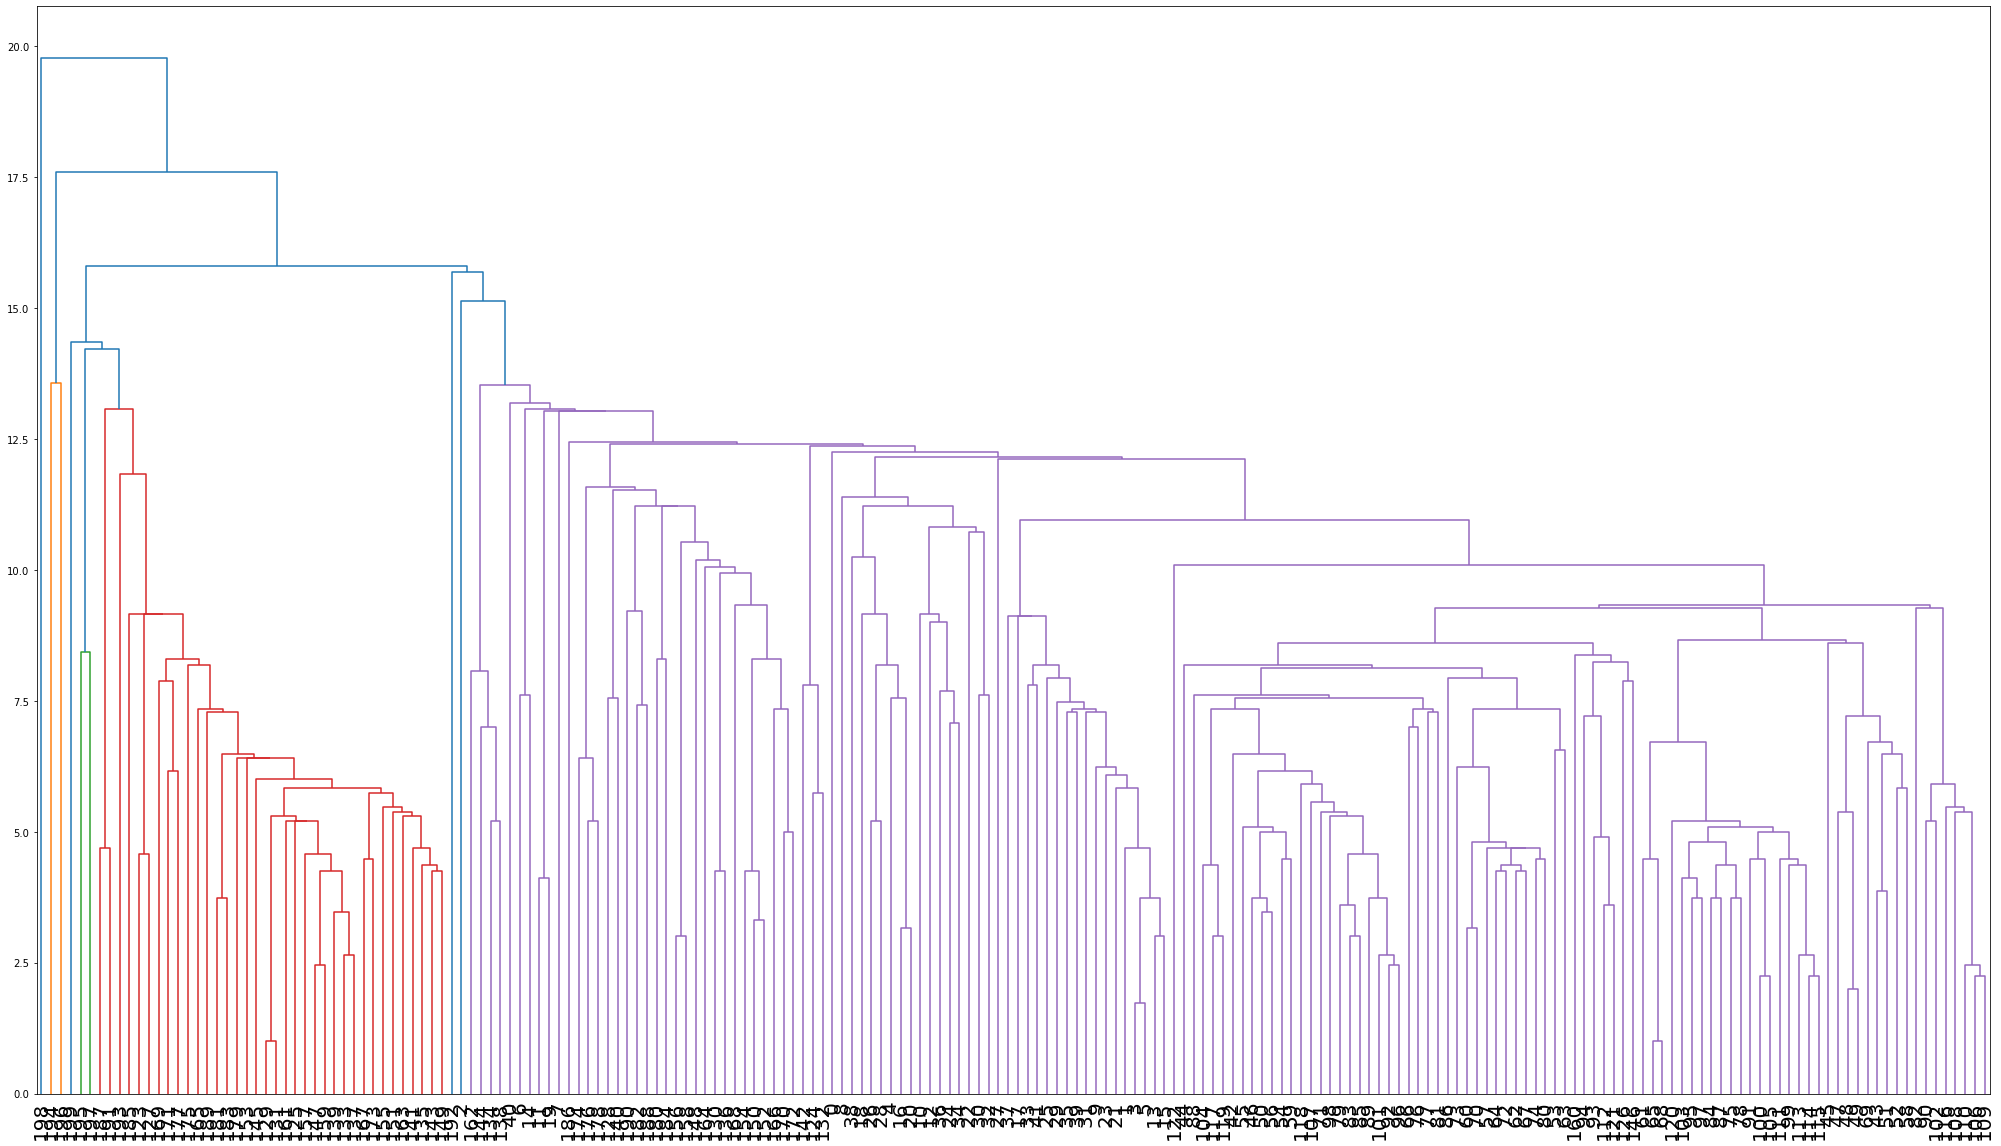

In [26]:
# Different ways to compute distance between two clusters
# Single Linkage

plt.figure(figsize=(35, 20))
mergings = linkage(customer, method="single", metric="euclidean")
dendrogram(mergings)
plt.xticks(rotation=90,fontsize=20)
plt.show()

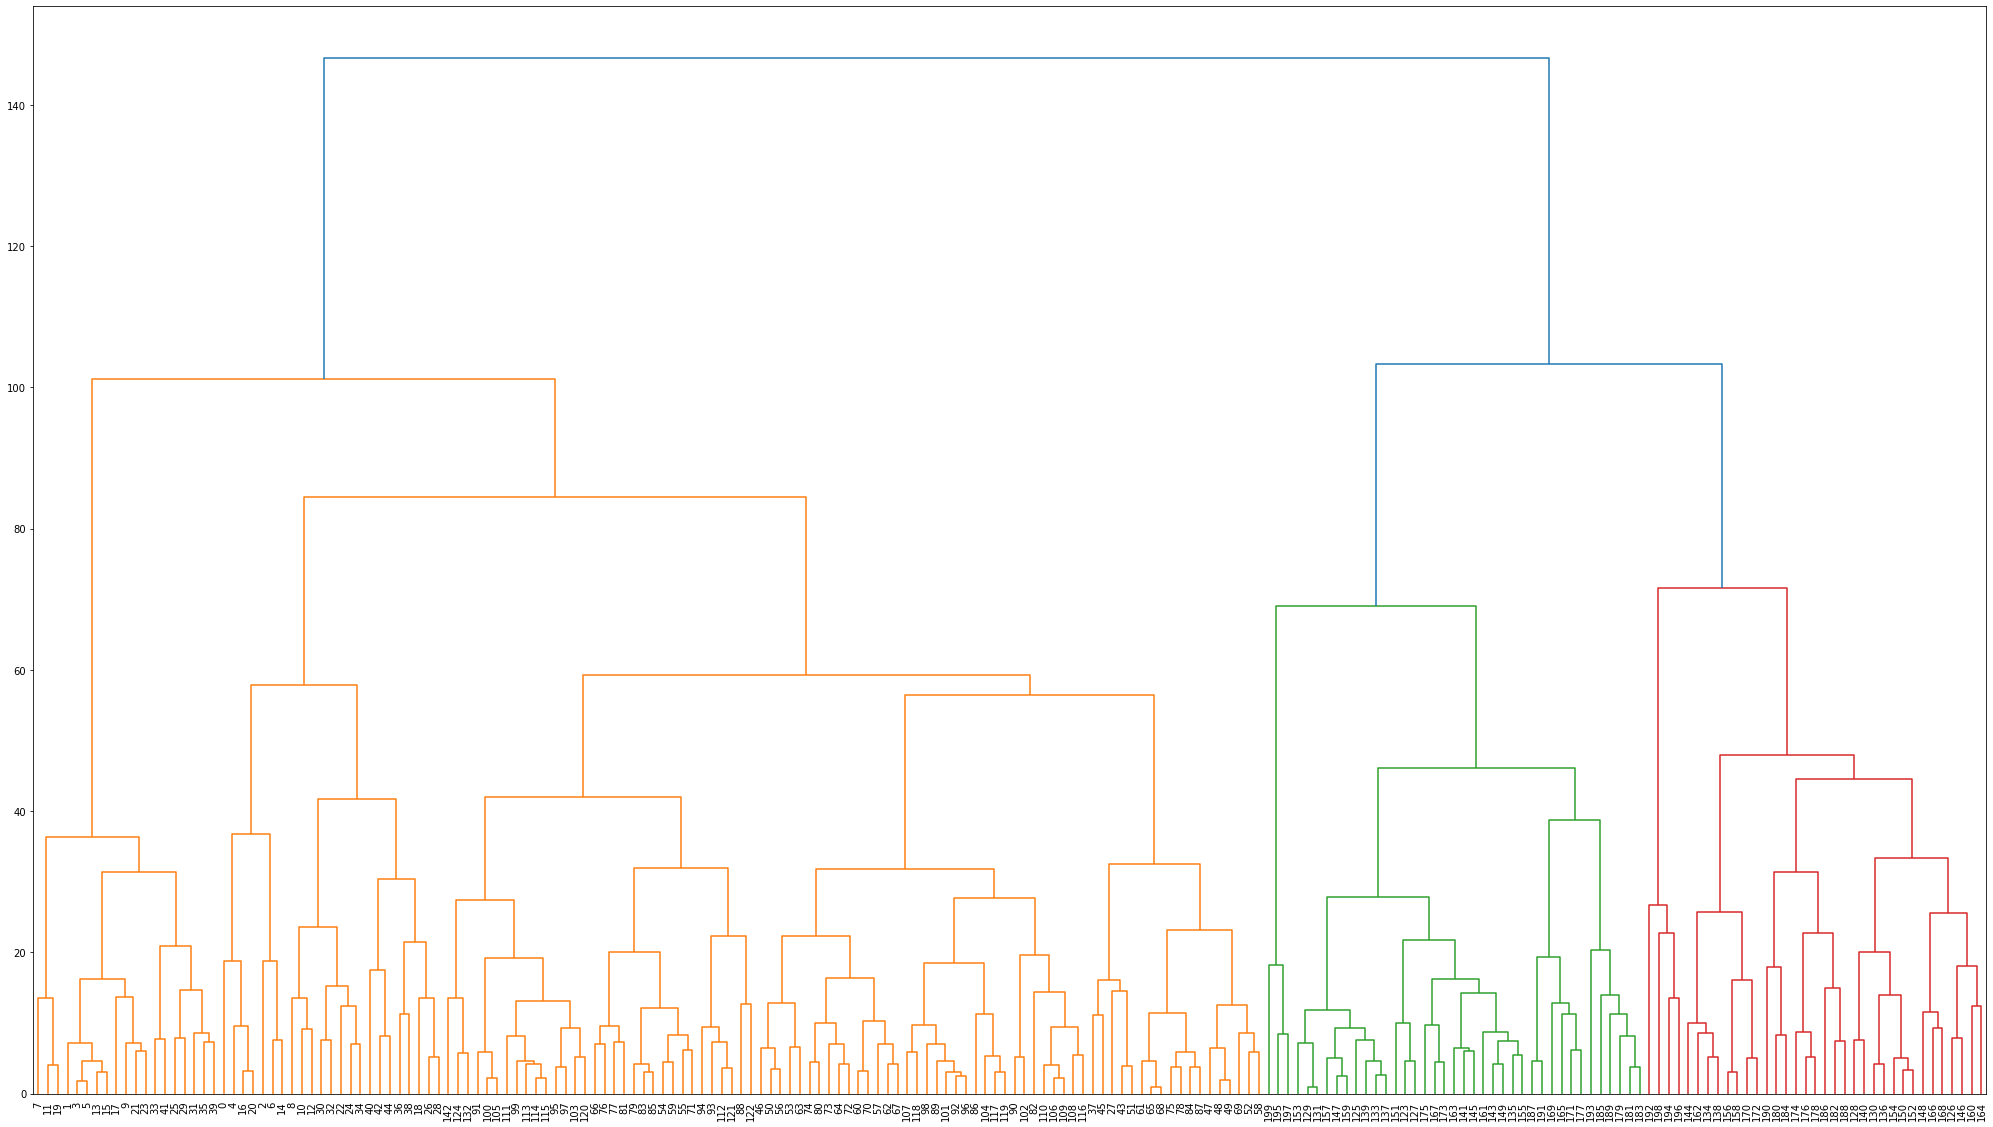

In [27]:
# Complete Linkage

plt.figure(figsize=(35, 20))
mergings = linkage(customer, method="complete", metric="euclidean")
dendrogram(mergings)
plt.xticks(rotation=90,fontsize=10)
plt.show()

In [28]:
cut_tree(mergings, n_clusters=4)

array([[0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
    

In [29]:
lables = cut_tree(mergings, n_clusters=4).reshape(-1, )

lables

array([0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 3, 2, 3, 2, 3, 2,
       0, 2, 3, 2, 3, 2, 3, 2, 3, 2, 0, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2])

Text(0.5, 1.0, 'Agglomerative Clustering')

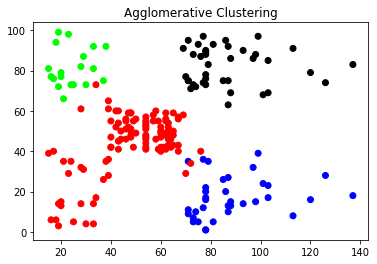

In [30]:
colormap = np.array(['red', 'lime', 'black','blue'])
 
# Plot the Original Classifications
plt.scatter(customer['Annual Income (k$)'], customer['Spending Score (1-100)'], c=colormap[lables])
plt.title('Agglomerative Clustering')

### DB SCAN

In [31]:
customer.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Label
0,1,19,15,39,3
1,1,21,15,81,5
2,0,20,16,6,3
3,0,23,16,77,5
4,0,31,17,40,3


In [32]:
x = customer.iloc[:,[2,3]].values

In [33]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=5,min_samples=6)

In [34]:
model = dbscan.fit(x)

In [35]:
labels = model.labels_

In [36]:
labels

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  0,  0,  0,  0,  0,
       -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0, -1, -1,  1, -1, -1,  2,  1,  2,  1, -1,  1,  2,  3,
        2,  1,  2,  1,  2,  3, -1,  3, -1, -1, -1,  1, -1,  3, -1,  3, -1,
        1, -1,  3, -1,  1, -1,  1, -1,  3, -1,  3, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], dtype=int64)

In [37]:
np.unique(labels)

array([-1,  0,  1,  2,  3], dtype=int64)

In [38]:
silhouette_score(x,labels)

0.06353533083993718